<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 3: Web APIs & NLP

# Problem Statement

*Project Goal*

To take on Microsoft Teams indirectly. Microsoft Teams (MST) is our largest, fastest growing and well funded competitor, we want to examine what users have been discussing on Reddit by applying NLP techniques. 

*Model to be developed*

We will then train a classifier to accurately classify content between the two Sub-Reddits which are Zoom and Microsoft Teams. We will be using the following models of Logistic Regression, Random Forest and Multinomial Naive Bayes, before selecting the best performing model to be refined.

*Success evaluation*

Based on the model, we will make recommendations to the software development team and the marketing team. We evaluate success as the final model being able to provide sufficiently high level of classification accuracy, so that we can extract words or word groupings with high coefficient to either class, and use them SEM & SEM, and explore them to suggest user's pain points or new technical features desired.

*Scope of the project*

For the Software Development Team, we will attempt to highlight what are the common issues faced by users, as well as any additional features that the users would like to have. Hence, we will be able to update the product to retain more current users and attract new users.

For the Digital Marketing Team, we will look at what features the Microsoft Teams (MST) users have issues with (more than Zoom users). We will tweak our campaigns to capitalise on their perceived weaknesses and (ii) to look at which words are closely associated with Zoom and MST. These words can considered for our Search Engine Marketing and Search Engine Optimisation campaigns. To utilise these words as paid keywords such as Google Ads or organic keywords in our sites.

*Who cares?*

<s>My *daddy*, Eric **YUAN**, ceo of ZOOM, cares very much about his cashcow and I, **YUAN** Shuyi, care about passing my projects and getting my smart GA school mates to work on this for free.</s>
Even though Zoom has the biggest market share of video conferencing platforms at the global start of the pandemic in April 2020, Microsoft has been hitting back hard by converting existing MS Office 365 users to MS Teams. We need to seek and retain more customers before MS gets to them.

*Audience and the primary and secondary stakeholders*

We are Zoom's data science team, addressing our software development and digital marketing teams, looking for solutions to ultimately inprove Zoom's bottomline for the shareholers. 

# Background

We have all been impacted by Covid-19 directly. With the lockdowns, remote working and even remote socializing, video conferencing platforms become one of the main ways to stay connected in a group. 

Zoom was founded in 2011, San Jose, California, United States. The coronavirus crisis has accelerated Zoom’s growth because of the sudden growth in the need for group video chat. It’s much easier to use than Hangouts or Skype or most other messenger systems because it doesn’t need a login and runs in a browser. Zoom being free to use and able to host up to 50 attendees was heavily marketed to/ adopted by educators, social groups and businesses. 

Although it is the market leader, this market is attracting new entrants. Zoom is experiencing pushbacks from their competitors. There's the continuous need to market better, and ship a better product.  

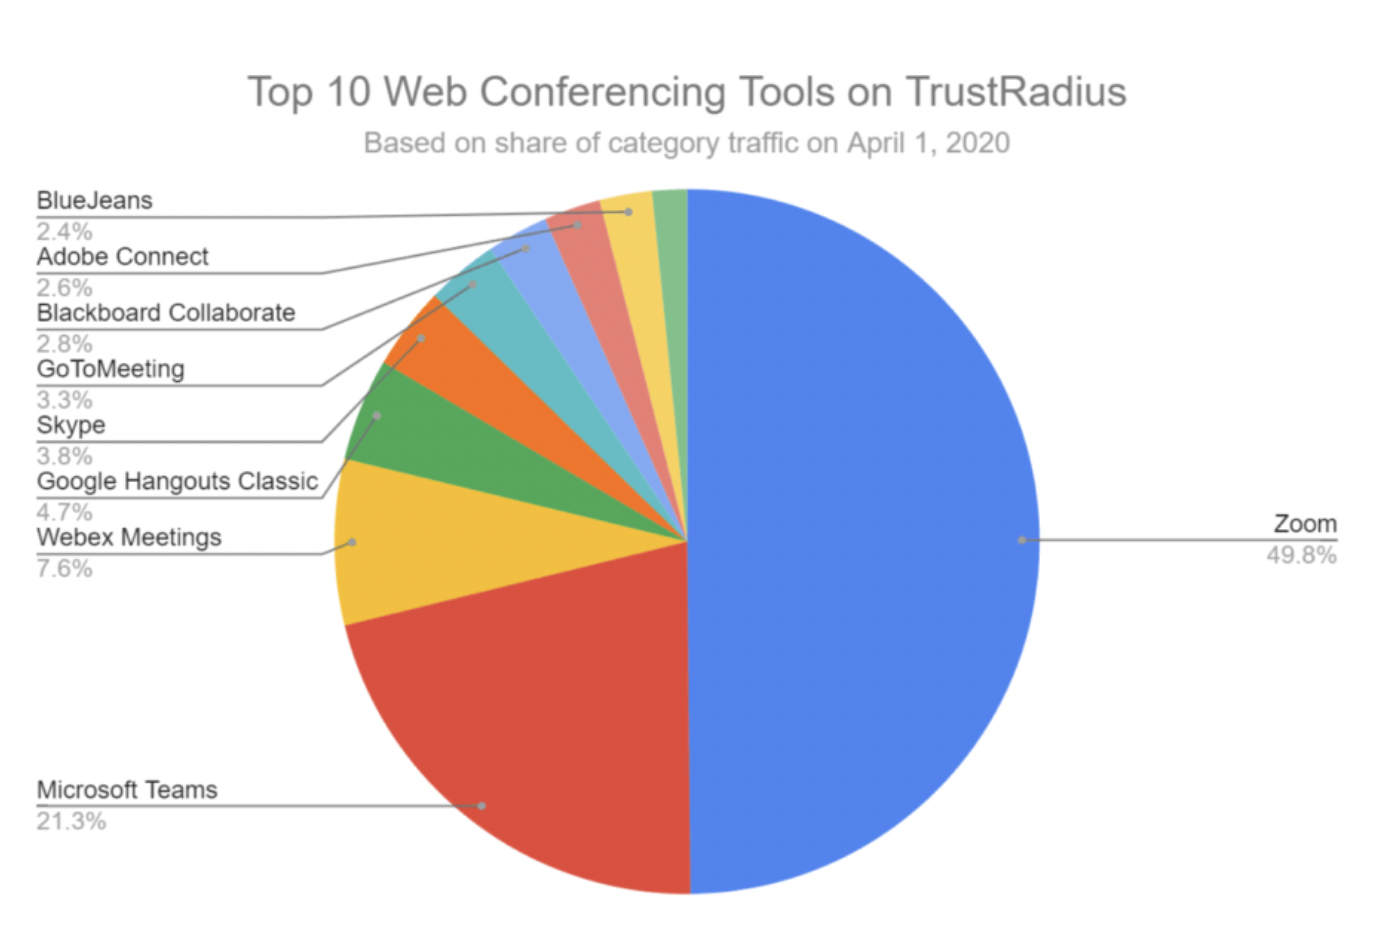

# Data

Data points were scrapped from 
1. Zoom subreddit. https://www.reddit.com/r/Zoom/
2. Microsoft Teams subreddit. https://www.reddit.com/r/Zoom/

# Outside Research

1.Basic readings related to Zoom vs Teams' market share 

https://www.trustradius.com/buyer-blog/top-5-skype-alternatives

https://www.businessofapps.com/data/zoom-statistics/

https://www.businessofapps.com/data/microsoft-teams-statistics/
    
2.A couple of Quora posts on why the preference for Zoom over other platforms 

https://www.quora.com/Why-is-Zoom-the-more-popular-option-for-video-calls-or-conferencing-for-online-classes-and-not-older-services-like-Skype-or-Google-Hangouts

https://www.quora.com/Why-did-Zoom-video-chat-get-so-popular-Why-dont-people-just-use-existing-video-conferencing-services-like-Google-Hangouts-or-Skype

https://www.quora.com/Why-are-people-using-Zoom-There-is-some-obvious-upside-to-Zoom-over-its-competition-from-Microsoft-s-Skype-and-Google-Hangouts

3.Some Zoom vs Teams comparisons

https://www.forbes.com/advisor/business/software/microsoft-teams-vs-zoom/

https://www.techradar.com/sg/news/microsoft-teams-vs-zoom-which-video-conferencing-and-collaboration-service-is-best

https://www.unifysquare.com/blog/microsoft-teams-vs-zoom/

4.Digital marketing refresher

https://www.k6agency.com/negative-keywords/

https://www.revlocal.com/resources/library/blog/how-to-differentiate-google-ads-and-google-smart-campaigns

https://digitalmarketinginstitute.com/blog/how-do-seo-and-sem-work-together-in-2018


# Data Collection

Was enough data gathered to generate a significant result? 

- A year's worth of data was gathered from 1 Apr 2020, starting at the height of the pandemic. Collecting a year's worth may enable easier year-on-year comparisons in future.  
- 10742 data points were scrapped from Zoom subreddit. https://www.reddit.com/r/Zoom/
- 7030 data points were scrapped from Microsoft Teams subreddit. https://www.reddit.com/r/Zoom/
https://www.reddit.com/r/MicrosoftTeams/
- Before cleaning, we have more than 1,000 data points. 10742 & 7030 seem sufficient to generate a significant result.

Was data collected that was useful and relevant to the project?

- By using api.pushshift.io, all 83 fields of each subreddit post are returned. Most of these 83 columns will be dropped later. 

Was data collection and storage optimized through custom functions, pipelines, and/or automation?

- Custom function that scraps 100 posts through pushshift, loops and adds the datapoints to json, with the params of scrapping from 1 Apr 2020 to 31 Mar 2021. (Thanks Hong Aik & Mitchelle!)

Was thought given to the server receiving the requests such as considering number of requests per second?

- Use of pushshift lessens the likehood of the server thinking we are attacking it. 
- time.sleep(3) added too.

In [12]:
# import libraries
import requests
import pandas as pd
import time

pd.set_option('display.max_columns', 500)
pd.options.mode.chained_assignment = None  # default='warn'

In [5]:
# set parameters Zoom
params_zoom = {
    'subreddit': 'zoom',
    'size': 100, #max no of post we are allowed to scrap at any one time
    'after': 1585699200, # after 1 Apr 2020
    'before': 1617235200 # before 1 Apr 2021
}

url = 'https://api.pushshift.io//reddit/search/submission'

# get first tranche of data in a list. This retrieves the earliest 100 submissions
res_zoom = requests.get(url, params_zoom)
res_data_zoom = res_zoom.json()['data']

res_data_zoom_add = ['empty']

# update the 'after' params with the latest timestamp and retrieve the next 100 submissions
while len(res_data_zoom_add) > 0:
    time.sleep(3)
    params_zoom['after'] = res_data_zoom[-1]['created_utc']
    res_data_zoom_add = requests.get(url, params_zoom).json()['data']
    res_data_zoom += res_data_zoom_add

In [7]:
# finding out the number of Zoom's data points
len(res_data_zoom)

10742

In [6]:
# checking on one Zoom data point
res_data_zoom[:1]

[{'all_awardings': [],
  'allow_live_comments': False,
  'author': 'LionSuneater',
  'author_flair_css_class': None,
  'author_flair_richtext': [],
  'author_flair_text': None,
  'author_flair_type': 'text',
  'author_fullname': 't2_4don0ngl',
  'author_patreon_flair': False,
  'author_premium': False,
  'awarders': [],
  'can_mod_post': False,
  'contest_mode': False,
  'created_utc': 1585700105,
  'domain': 'self.Zoom',
  'edited': 1585702800,
  'full_link': 'https://www.reddit.com/r/Zoom/comments/fsopa0/can_i_keep_a_back_screen_with_my_video_off_if_i/',
  'gildings': {},
  'id': 'fsopa0',
  'is_crosspostable': True,
  'is_meta': False,
  'is_original_content': False,
  'is_reddit_media_domain': False,
  'is_robot_indexable': True,
  'is_self': True,
  'is_video': False,
  'link_flair_background_color': '#00a6a5',
  'link_flair_richtext': [],
  'link_flair_template_id': '3cc8414a-6fc3-11ea-bd71-0e1557d8426f',
  'link_flair_text': 'Question',
  'link_flair_text_color': 'light',
  'lin

In [5]:
# turning it from json to Pandas to work on it easily
dfzoom = pd.DataFrame(res_data_zoom)

In [6]:
# customary checks - .info / .head
dfzoom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10742 entries, 0 to 10741
Data columns (total 83 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   all_awardings                  10742 non-null  object 
 1   allow_live_comments            10742 non-null  bool   
 2   author                         10742 non-null  object 
 3   author_flair_css_class         0 non-null      object 
 4   author_flair_richtext          10520 non-null  object 
 5   author_flair_text              9 non-null      object 
 6   author_flair_type              10520 non-null  object 
 7   author_fullname                10520 non-null  object 
 8   author_patreon_flair           10520 non-null  object 
 9   author_premium                 10520 non-null  object 
 10  awarders                       10742 non-null  object 
 11  can_mod_post                   10742 non-null  bool   
 12  contest_mode                   10742 non-null 

In [7]:
dfzoom.head()

,all_awardings,allow_live_comments,author,author_flair_css_class,author_flair_richtext,author_flair_text,author_flair_type,author_fullname,author_patreon_flair,author_premium,awarders,can_mod_post,contest_mode,created_utc,domain,edited,full_link,gildings,id,is_crosspostable,is_meta,is_original_content,is_reddit_media_domain,is_robot_indexable,is_self,is_video,link_flair_background_color,link_flair_richtext,link_flair_template_id,link_flair_text,link_flair_text_color,link_flair_type,locked,media_only,no_follow,num_comments,num_crossposts,over_18,permalink,pinned,retrieved_on,score,selftext,send_replies,spoiler,stickied,subreddit,subreddit_id,subreddit_subscribers,subreddit_type,suggested_sort,thumbnail,title,total_awards_received,url,author_cakeday,author_flair_background_color,author_flair_text_color,removed_by_category,post_hint,preview,thumbnail_height,thumbnail_width,discussion_type,media,media_embed,secure_media,secure_media_embed,crosspost_parent,crosspost_parent_list,banned_by,media_metadata,treatment_tags,poll_data,author_flair_template_id,upvote_ratio,url_overridden_by_dest,parent_whitelist_status,pwls,whitelist_status,wls,gallery_data,is_gallery
0,[],False,LionSuneater,None,[],None,text,t2_4don0ngl,False,False,[],False,False,1585700105,self.Zoom,1.585703e+09,https://www.reddit.com/r/Zoom/comments/fsopa0/...,{},fsopa0,True,False,False,False,True,True,False,#00a6a5,[],3cc8414a-6fc3-11ea-bd71-0e1557d8426f,Question,light,text,False,False,True,0,0,False,/r/Zoom/comments/fsopa0/can_i_keep_a_back_scre...,False,1585702837,2,I'd like to keep the standard black screen wit...,True,False,False,Zoom,t5_3095n,713,public,confidence,self,Can I keep a back screen with my video off if ...,0,https://www.reddit.com/r/Zoom/comments/fsopa0/...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,[],False,lucky8771,None,[],None,text,t2_14mbxhvl,False,False,[],False,False,1585700851,self.Zoom,NaN,https://www.reddit.com/r/Zoom/comments/fsowjy/...,{},fsowjy,True,False,False,False,True,True,False,#373c3f,[],5bc9e972-6fc3-11ea-aba4-0eacc84975dd,Other,light,text,False,False,True,2,0,False,/r/Zoom/comments/fsowjy/drop_a_code_of_a_class...,False,1585703476,1,,True,False,False,Zoom,t5_3095n,713,public,confidence,self,Drop a code of a class or something going on r...,0,https://www.reddit.com/r/Zoom/comments/fsowjy/...,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,[],False,[deleted],None,NaN,None,NaN,NaN,NaN,NaN,[],False,False,1585701378,self.Zoom,NaN,https://www.reddit.com/r/Zoom/comments/fsp1ty/...,{},fsp1ty,False,False,False,False,False,True,False,#ea0027,[],301a1bf8-6fc3-11ea-acec-0e488576d83f,Meme,light,text,False,False,True,8,0,False,/r/Zoom/comments/fsp1ty/aus_zoom_storm/,False,1585703929,1,[deleted],True,False,False,Zoom,t5_3095n,713,public,confidence,default,AUS ZOOM STORM,0,https://www.reddit.com/r/Zoom/comments/fsp1ty/...,NaN,,dark,deleted,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,[],False,loggotchi123,None,[],None,text,t2_4j9vxwag,False,False,[],False,False,1585702551,self.Zoom,NaN,https://www.reddit.com/r/Zoom/comments/fspdb7/...,{},fspdb7,True,False,False,False,True,True,False,#ea0027,[],301a1bf8-6fc3-11ea-acec-0e488576d83f,Meme,light,text,False,False,True,18,0,False,/r/Zoom/comments/fspdb7/links/,False,1585704931,1,Anyone have zoom links I can join,True,False,False,Zoom,t5_3095n,716,public,confidence,self,Links?,0,https://www.reddit.com/r/Zoom/comments/fspdb7/...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,[],False,MalleableJelloAir,None,[],None,text,t2_490ktnff,False,False,[],False,False,1585704963,self.Zoom,NaN,https://www.reddit.com/r/Zoom/comments/fsq0gc/...,{},fsq0gc,True,False,False,False,True,True,False,#00a6a5,[],3cc8414a-6fc3-11ea-bd71-0e1557d8426f,Question,light,text,False,Fa

In [18]:
# exporting to csv
dfzoom.to_csv('./zoom_scraped.csv', index=False)

Repeating all the above steps to scrap and export Microsoft Teams subreddit.

In [9]:
# set parameters MST
params_mst = {
    'subreddit': 'microsoftteams',
    'size': 100,
    'after': 1585699200, # after 1 Apr 2020
    'before': 1617235200 # before 1 Apr 2021
}

url = 'https://api.pushshift.io//reddit/search/submission'

# get first tranche of data in a list. This retrieves the earliest 100 submissions
res_mst = requests.get(url, params_mst)
res_data_mst = res_mst.json()['data']

res_data_mst_add = ['empty']

# update the 'after' params with the latest timestamp and retrieve the next 100 submissions
while len(res_data_mst_add) > 0:
    time.sleep(3)
    params_mst['after'] = res_data_mst[-1]['created_utc']
    res_data_mst_add = requests.get(url, params_mst).json()['data']
    res_data_mst += res_data_mst_add

In [10]:
len(res_data_mst)

7030

In [11]:
res_data_mst[:1]

[{'all_awardings': [],
  'allow_live_comments': False,
  'author': 'Adam_Ch',
  'author_flair_css_class': None,
  'author_flair_richtext': [],
  'author_flair_text': None,
  'author_flair_type': 'text',
  'author_fullname': 't2_dopyy',
  'author_patreon_flair': False,
  'author_premium': False,
  'awarders': [],
  'can_mod_post': False,
  'contest_mode': False,
  'created_utc': 1585699924,
  'domain': 'self.MicrosoftTeams',
  'full_link': 'https://www.reddit.com/r/MicrosoftTeams/comments/fsonn9/how_do_i_keep_planner_pinned_to_my_sidebar/',
  'gildings': {},
  'id': 'fsonn9',
  'is_crosspostable': True,
  'is_meta': False,
  'is_original_content': False,
  'is_reddit_media_domain': False,
  'is_robot_indexable': True,
  'is_self': True,
  'is_video': False,
  'link_flair_background_color': '',
  'link_flair_richtext': [],
  'link_flair_text_color': 'dark',
  'link_flair_type': 'text',
  'locked': False,
  'media_only': False,
  'no_follow': True,
  'num_comments': 1,
  'num_crossposts':

In [12]:
dfmst = pd.DataFrame(res_data_mst)

In [13]:
dfmst.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7030 entries, 0 to 7029
Data columns (total 86 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   all_awardings                  7030 non-null   object 
 1   allow_live_comments            7030 non-null   bool   
 2   author                         7030 non-null   object 
 3   author_flair_css_class         1 non-null      object 
 4   author_flair_richtext          6941 non-null   object 
 5   author_flair_text              52 non-null     object 
 6   author_flair_type              6941 non-null   object 
 7   author_fullname                6941 non-null   object 
 8   author_patreon_flair           6941 non-null   object 
 9   author_premium                 6941 non-null   object 
 10  awarders                       7030 non-null   object 
 11  can_mod_post                   7030 non-null   bool   
 12  contest_mode                   7030 non-null   b

In [19]:
dfmst.to_csv('./mst_scraped.csv', index=False)